In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as graph
import seaborn as sns

from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import boston_housing

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [3]:
scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    model.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    return model

n_splits = 5
data_splitter = KFold(n_splits=n_splits)

results = []
for train_idx, test_idx in tqdm(data_splitter.split(x_train), total=n_splits):
    
    x_val_train, x_val_test = x_train[train_idx], x_train[test_idx]
    y_val_train, y_val_test = y_train[train_idx], y_train[test_idx]
    
    model = build_model()
    history = model.fit(x_val_train, y_val_train, epochs=150, batch_size=1, validation_data=(x_val_test, y_val_test), verbose=False)
    results.append(history)

  0%|          | 0/5 [00:00<?, ?it/s]

(323, 13) (81, 13) (323,) (81,)


 20%|██        | 1/5 [01:05<04:20, 65.04s/it]

(323, 13) (81, 13) (323,) (81,)


 40%|████      | 2/5 [02:13<03:19, 66.51s/it]

(323, 13) (81, 13) (323,) (81,)


 60%|██████    | 3/5 [03:21<02:14, 67.07s/it]

(323, 13) (81, 13) (323,) (81,)


 80%|████████  | 4/5 [04:26<01:06, 66.53s/it]

(324, 13) (80, 13) (324,) (80,)


100%|██████████| 5/5 [05:32<00:00, 66.44s/it]


In [37]:
final_results = {}

for history in results:
    for key, value in history.history.items():
        value = np.array(value)
        prev_val = final_results.get(key, np.ones(len(value)))
        values = np.vstack([value, prev_val])
        final_results[key] = np.mean(values, axis=0)

df1 = pd.DataFrame(final_results)
df1.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,192.980562,10.184846,43.206478,4.296341
1,28.669055,3.577375,25.860852,3.293670
2,19.908569,2.951399,20.299328,2.960183
3,15.863884,2.636435,18.309626,2.862022
4,13.648179,2.462690,16.357644,2.690249


In [57]:
(216 + 181) / 2

198.5

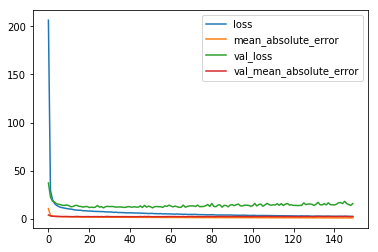

In [67]:
df = pd.DataFrame(results[0].history)

for history in results[1:]:
    for key, value in history.history.items():
        df[key] = (df[key] + np.array(value)) 
        
df = df / len(results)
df.plot()
graph.show()